parse session data,

session_start_end:
    metric: metric_ts_df ts, metric)

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
def get_metric_df(metric_json: dict) -> pd.DataFrame:
    """
    create a metric df based on metric json
    """
    posture_data_lst = []
    for ts, score in metric_json.items():
        posture_data_lst.append((ts, score))
    posture_data_df = pd.DataFrame(posture_data_lst, columns=['ts', 'value'])
    posture_data_df['ts'] = posture_data_df['ts'].apply(int)
    posture_data_df['session_time'] = posture_data_df['ts'] - posture_data_df['ts'].min()
    return posture_data_df.sort_values("ts")


def get_session_metric_data(session_name: str) -> pd.DataFrame:
    """
    read the folder that contains data for a single session
    """
    posture_data_files = list(Path(session_name).glob(f"*.json"))
    posture_data_dict = dict()
    for file in posture_data_files:
        metric_name = file.name.split(".")[0]
        with open(file) as infile:
            json_data = json.load(infile)
            metric_df = get_metric_df(json_data)
            metric_df['metric_name'] = metric_name
            posture_data_dict[metric_name] = metric_df
    return posture_data_dict

In [14]:
import os
DATA_ROOT_DIR = '../posture_data'
ARCHVE_DATA_ROOT_DIR = '../archive/test_dir'

In [52]:
metric_data = get_session_metric_data("test_dir/session_1643044722_1643057444")

In [53]:
metric_data.keys()

dict_keys(['alert_ts', 'headdown', 'headdown_seconds', 'landmark_0_x', 'landmark_0_y', 'landmark_10_x', 'landmark_10_y', 'landmark_11_x', 'landmark_11_y', 'landmark_12_x', 'landmark_12_y', 'landmark_1_x', 'landmark_1_y', 'landmark_2_x', 'landmark_2_y', 'landmark_3_x', 'landmark_3_y', 'landmark_4_x', 'landmark_4_y', 'landmark_5_x', 'landmark_5_y', 'landmark_6_x', 'landmark_6_y', 'landmark_7_x', 'landmark_7_y', 'landmark_8_x', 'landmark_8_y', 'landmark_9_x', 'landmark_9_y', 'left_right_shoulder_y_diff', 'left_shoulder_x', 'left_shoulder_y', 'rightshoulder_down_seconds', 'right_shoulder_x', 'right_shoulder_y', 'shoulder_tilt_seconds'])

In [82]:
session_data_dirs = list(Path(DATA_ROOT_DIR).glob(f"session_16*_*"))
len(session_data_dirs)
session_data_dirs

[WindowsPath('../posture_data/session_1643504032_1643504038'),
 WindowsPath('../posture_data/session_1643504040_1643504172'),
 WindowsPath('../posture_data/session_1643504176_1643504176'),
 WindowsPath('../posture_data/session_1643504291_1643504523'),
 WindowsPath('../posture_data/session_1643505119_1643505125'),
 WindowsPath('../posture_data/session_1643505138_1643505178'),
 WindowsPath('../posture_data/session_1643505365_1643505372'),
 WindowsPath('../posture_data/session_1643505408_1643505484'),
 WindowsPath('../posture_data/session_1643521469_1643521606'),
 WindowsPath('../posture_data/session_1643521739_1643521850'),
 WindowsPath('../posture_data/session_1643521855_1643521896'),
 WindowsPath('../posture_data/session_1643521940_1643521991'),
 WindowsPath('../posture_data/session_1643522054_1643522172'),
 WindowsPath('../posture_data/session_1643522175_1643522195'),
 WindowsPath('../posture_data/session_1643522211_1643522246'),
 WindowsPath('../posture_data/session_1643522275_164352

In [83]:
for session_data_dir in session_data_dirs:
    start_time = int(session_data_dir.name.split("_")[1])
    if  start_time < 1643522275:
            continue
    metric_data = get_session_metric_data(session_data_dir)
    if 'alert_ts' in metric_data and metric_data['alert_ts'].shape[0] >= 10:
        print(metric_data['alert_ts']['ts'].min())
        session_duration_seconds= metric_data['alert_ts'].shape[0]
        print(f"session score: {(metric_data['alert_ts']['value']==0).sum()} / {session_duration_seconds}")
        last_metric_data = metric_data
        for metric, df in last_metric_data.items():
            print(f"\t {metric}: {df.shape[0]}")
        print("\n\n\n")

1643522277
session score: 403 / 487
	 alert_ts: 487
	 good_posture: 616
	 headdown: 496
	 headdown_seconds: 490
	 landmark_0_x: 487
	 landmark_0_y: 487
	 landmark_10_x: 487
	 landmark_10_y: 487
	 landmark_11_x: 487
	 landmark_11_y: 487
	 landmark_12_x: 487
	 landmark_12_y: 487
	 landmark_1_x: 487
	 landmark_1_y: 487
	 landmark_2_x: 487
	 landmark_2_y: 487
	 landmark_3_x: 487
	 landmark_3_y: 487
	 landmark_4_x: 487
	 landmark_4_y: 487
	 landmark_5_x: 487
	 landmark_5_y: 487
	 landmark_6_x: 487
	 landmark_6_y: 487
	 landmark_7_x: 487
	 landmark_7_y: 487
	 landmark_8_x: 487
	 landmark_8_y: 487
	 landmark_9_x: 487
	 landmark_9_y: 487
	 left_right_shoulder_y_diff: 496
	 left_shoulder_x: 487
	 left_shoulder_y: 487
	 rightshoulder_down_seconds: 487
	 right_shoulder_x: 487
	 right_shoulder_y: 490
	 shoulder_tilt_seconds: 490




1643522907
session score: 145 / 241
	 alert_ts: 241
	 good_posture: 297
	 headdown: 246
	 headdown_seconds: 243
	 landmark_0_x: 241
	 landmark_0_y: 241
	 landmark_10_x

In [89]:
last_metric_data['good_posture']['value'].mean()

0.1971153846153846

In [91]:
# (last_metric_data['good_posture']['ts'].max(), last_metric_data['left_right_shoulder_y_diff'].max())

In [99]:
last_metric_data['left_right_shoulder_y_diff'].reset_index()

,index,ts,value,session_time,metric_name
0,1,1643524142,0.000000,0,left_right_shoulder_y_diff
1,0,1643524143,0.006836,1,left_right_shoulder_y_diff
2,2,1643524144,0.008580,2,left_right_shoulder_y_diff
3,3,1643524145,0.018293,3,left_right_shoulder_y_diff
4,4,1643524146,0.022522,4,left_right_shoulder_y_diff
...,...,...,...,...,...
206,206,1643526221,0.014744,2079,left_right_shoulder_y_diff
207,207,1643526222,0.070412,2080,left_right_shoulder_y_diff
208,208,1643526223,0.075552,2081,left_right_shoulder_y_diff
209,209,1643526224,0.035565,2082,left_right_shoulder_y_diff


(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]), <a list of 10 Text xticklabel objects>)

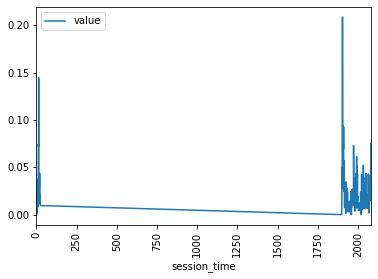

In [100]:
last_metric_data['left_right_shoulder_y_diff'].reset_index().plot(x='session_time',y='value')
plt.xticks(rotation=90)

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 10 Text xticklabel objects>)

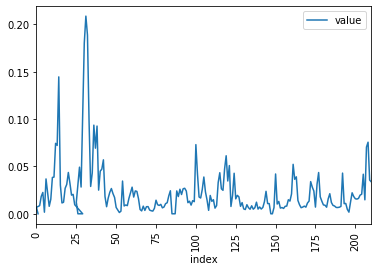

In [102]:
last_metric_data['left_right_shoulder_y_diff'].reset_index().plot(x='index',y='value')
plt.xticks(rotation=90)

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 10 Text xticklabel objects>)

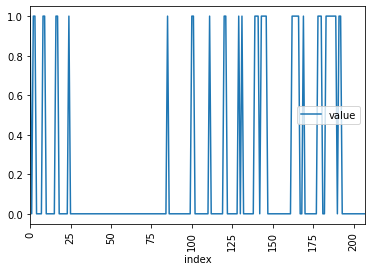

In [104]:
last_metric_data['good_posture'].reset_index().plot(x='index',y='value')
plt.xticks(rotation=90)

In [105]:
posture_data_files = list(Path("test_dir/session_1642373199").glob(f"*.json"))

In [107]:
metric_ts_dict = last_metric_data

In [108]:
metric_ts_dict.keys()

dict_keys(['alert_ts', 'good_posture', 'headdown', 'headdown_seconds', 'landmark_0_x', 'landmark_0_y', 'landmark_10_x', 'landmark_10_y', 'landmark_11_x', 'landmark_11_y', 'landmark_12_x', 'landmark_12_y', 'landmark_1_x', 'landmark_1_y', 'landmark_2_x', 'landmark_2_y', 'landmark_3_x', 'landmark_3_y', 'landmark_4_x', 'landmark_4_y', 'landmark_5_x', 'landmark_5_y', 'landmark_6_x', 'landmark_6_y', 'landmark_7_x', 'landmark_7_y', 'landmark_8_x', 'landmark_8_y', 'landmark_9_x', 'landmark_9_y', 'left_right_shoulder_y_diff', 'left_shoulder_x', 'left_shoulder_y', 'rightshoulder_down_seconds', 'right_shoulder_x', 'right_shoulder_y', 'shoulder_tilt_seconds'])

In [111]:
metric_ts_dict['left_shoulder_y']

,ts,value,session_time,metric_name
0,1643524143,0.574513,0,left_shoulder_y
1,1643524144,0.545709,1,left_shoulder_y
2,1643524145,0.530209,2,left_shoulder_y
3,1643524146,0.563347,3,left_shoulder_y
4,1643524147,0.586734,4,left_shoulder_y
...,...,...,...,...
203,1643526221,0.588978,2078,left_shoulder_y
204,1643526222,0.531485,2079,left_shoulder_y
205,1643526223,0.517125,2080,left_shoulder_y
206,1643526224,0.547599,2081,left_shoulder_y


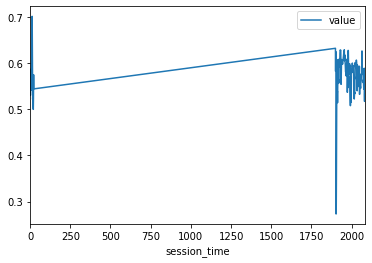

In [113]:
metric_ts_dict['left_shoulder_y'].plot(x='session_time', y='value')

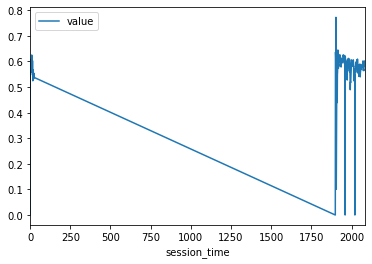

In [114]:
metric_ts_dict['right_shoulder_y'].plot(x='session_time', y='value')

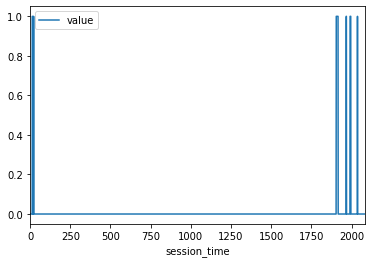

In [115]:
metric_ts_dict['shoulder_tilt_seconds'].plot(x='session_time', y='value')

#### percentage of time head is down

In [116]:
metric_ts_dict['headdown'].count()

ts              214
value           214
session_time    214
metric_name     214
dtype: int64

In [117]:
metric_ts_dict['headdown_seconds']['value'].mean()

0.5

In [120]:
(metric_ts_dict['headdown']['value']<0.25).astype(int).mean() # XD

0.27102803738317754

#### percent shoulder tilt

In [121]:
metric_ts_dict['left_shoulder_y'].columns

Index(['ts', 'value', 'session_time', 'metric_name'], dtype='object')

In [122]:
merge_df = metric_ts_dict['right_shoulder_y'].merge(metric_ts_dict['left_shoulder_y'], on=['ts'])
merge_df.head()

,ts,value_x,session_time_x,metric_name_x,value_y,session_time_y,metric_name_y
0,1643524143,0.580832,1,right_shoulder_y,0.574513,0,left_shoulder_y
1,1643524144,0.548009,2,right_shoulder_y,0.545709,1,left_shoulder_y
2,1643524145,0.547424,3,right_shoulder_y,0.530209,2,left_shoulder_y
3,1643524146,0.585869,4,right_shoulder_y,0.563347,3,left_shoulder_y
4,1643524147,0.587549,5,right_shoulder_y,0.586734,4,left_shoulder_y


In [124]:
metric_ts_dict['shoulder_tilt_seconds']['value'].mean()

0.11428571428571428

In [ ]:
##### (np.abs(merge_df['value_x'] - merge_df['value_y']) >= 0.02).mean()